## **Classify images**

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR) 

In [3]:
dataset, metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset = dataset['train'],dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete161H5U/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete161H5U/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
class_names = metadata.features['label'].names
print(f"class name {class_names}")

class name ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
## Explore the data

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print(f"trainig example = {num_train_examples}")
print(f"Test example = {num_test_examples}")

trainig example = 60000
Test example = 10000


In [7]:
## Process data
def normalize(images, labels):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images, labels

In [8]:
# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)


In [9]:
# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

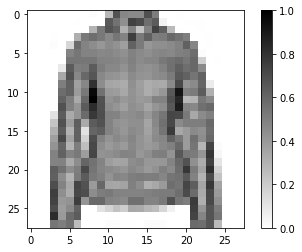

In [11]:
## explore the processed data
## take a single image, and remove the color dimetion by reshaping

for image, label in test_dataset.take(1):
  break
image=image.numpy().reshape((28,28))## removing cplour dimention

## plot the image
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

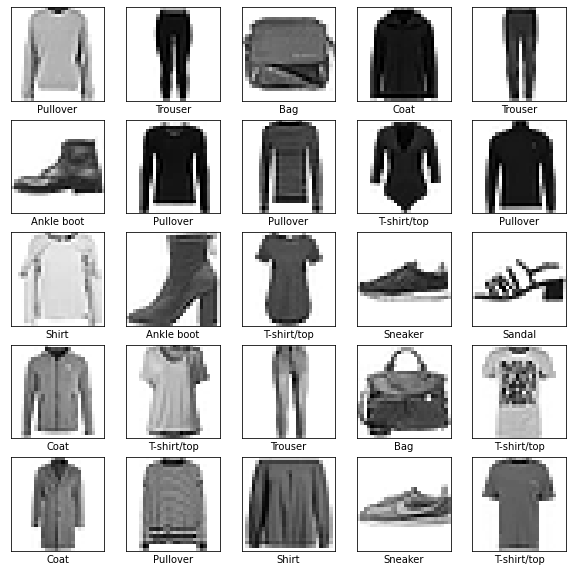

In [14]:
plt.figure(figsize=(10,10))
for i ,(image,label) in enumerate(train_dataset.take(25)):
  image=image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

In [15]:
## Bild model

In [16]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128,activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [19]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [20]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 13s 3ms/step - loss: 0.4933 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3723 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3283 - accuracy: 0.8805
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3112 - accuracy: 0.8865
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.8914


In [24]:
model.history.history['loss']

[0.4932829737663269,
 0.3722820281982422,
 0.3283112943172455,
 0.3112344741821289,
 0.2921990156173706]

In [26]:
model.history.history

{'accuracy': [0.8247666954994202,
  0.8644833564758301,
  0.880466639995575,
  0.8864666819572449,
  0.8913833498954773],
 'loss': [0.4932829737663269,
  0.3722820281982422,
  0.3283112943172455,
  0.3112344741821289,
  0.2921990156173706]}

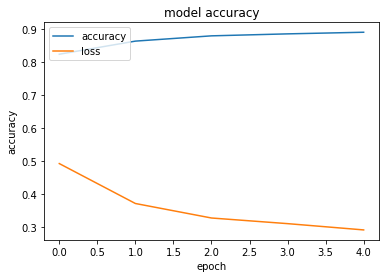

In [29]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
## model evaluate 
test_loss,test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_train_examples/32))
print(f"accuracy on the test data : {test_accuracy}")

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3554 - accuracy: 0.8722
accuracy on the test data : 0.8722000122070312


In [32]:
## Make prediction

for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [33]:
predictions.shape

(32, 10)

In [38]:
predictions

array([[4.52760905e-05, 6.41498355e-06, 2.38490421e-02, 7.26088365e-06,
        9.58653033e-01, 1.35869245e-08, 1.73799749e-02, 4.94324013e-08,
        5.88576841e-05, 7.62538761e-08],
       [1.52933399e-06, 7.30528571e-09, 7.83743616e-03, 7.31979810e-07,
        9.40665543e-01, 2.48636028e-10, 5.14861718e-02, 2.41926834e-09,
        8.49098160e-06, 7.51005924e-09],
       [6.40370263e-06, 1.63624890e-07, 2.26259402e-08, 1.03012594e-08,
        7.40509336e-07, 7.34366700e-02, 5.22809728e-07, 1.19161978e-02,
        1.14361019e-05, 9.14627850e-01],
       [2.00376906e-08, 6.09747863e-10, 5.90841376e-10, 1.14684970e-10,
        2.65265854e-09, 1.81320065e-04, 9.88677029e-10, 5.08469701e-01,
        2.01134117e-06, 4.91347015e-01],
       [7.27088221e-08, 3.03371282e-12, 3.77853393e-09, 1.77949391e-11,
        1.54274007e-11, 9.99998689e-01, 1.13383472e-07, 4.45935875e-08,
        1.13515797e-09, 1.08033578e-06],
       [3.64210592e-07, 9.99975443e-01, 3.30059313e-10, 2.40721165e-05,
   

In [34]:
predictions[0]

array([4.52760905e-05, 6.41498355e-06, 2.38490421e-02, 7.26088365e-06,
       9.58653033e-01, 1.35869245e-08, 1.73799749e-02, 4.94324013e-08,
       5.88576841e-05, 7.62538761e-08], dtype=float32)

In [35]:
np.argmax(predictions[0])

4

In [41]:
test_labels  ## test lable for test data

array([4, 4, 9, 7, 5, 1, 0, 5, 7, 4, 0, 8, 2, 3, 9, 0, 7, 7, 2, 2, 0, 4,
       4, 4, 2, 7, 7, 4, 2, 4, 7, 5])

In [40]:
test_labels[0] ## actuall test lable form the test data

4

In [42]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [43]:

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

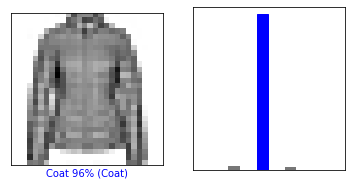

In [44]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

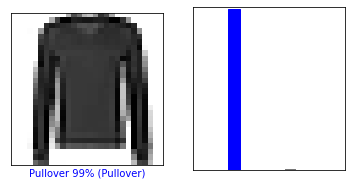

In [45]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

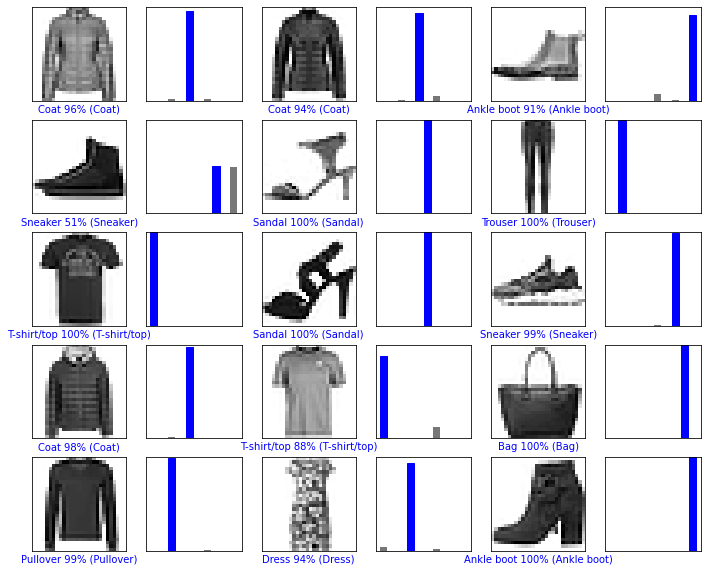

In [46]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [47]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [48]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [49]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.5276043e-05 6.4149835e-06 2.3849029e-02 7.2608836e-06 9.5865303e-01
  1.3586899e-08 1.7379967e-02 4.9432305e-08 5.8857629e-05 7.6253727e-08]]


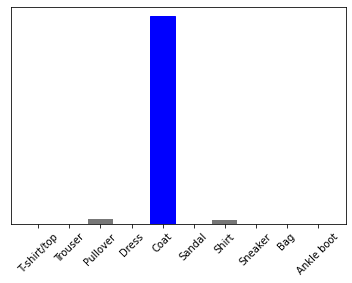

In [50]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [51]:
np.argmax(predictions_single[0])

4

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()